## Tarea: Implementación de un Perceptrón para Clasificación Binaria

**Integrantes:**
- Adrián Bedón
- Jairo Bedón
- Andrea Cobos
- Xavier Ramos

### 🎯 Objetivo

El objetivo de esta tarea es **diseñar e implementar un perceptrón multicapa (MLP) con al menos una capa oculta para resolver un problema de clasificación binaria**. El ejercicio busca que el estudiante aplique los conceptos fundamentales de las redes neuronales artificiales: funciones de activación, propagación hacia adelante (*forward propagation*), retropropagación del error (*backpropagation*), ajuste de pesos y evaluación de desempeño.

Al finalizar, el estudiante será capaz de modelar un problema donde, a partir de múltiples variables numéricas, se predice una **variable categórica dicotómica** (benigno/maligno).

### Instrucciones
- Utiliza el conjunto de datos **Breast Cancer Wisconsin** disponible en el siguiente enlace: https://raw.githubusercontent.com/marsgr6/rna-online/refs/heads/main/data/breast_cancer.csv
- Implementa un modelo de perceptrón con al menos una capa oculta.
- Entrena el modelo con un conjunto de entrenamiento y evalúalo en un conjunto de prueba.
- Visualiza la matriz de confusión y reporta las métricas de desempeño (precisión, recall, F1-score).
- Comenta brevemente los resultados obtenidos.

**Tiempo estimado:** 2 horas

### Dataset

El dataset **Breast Cancer Wisconsin**, disponible en `sklearn.datasets`, contiene datos clínicos utilizados para diagnosticar tumores mamarios como **malignos** o **benignos**, a partir de características extraídas de imágenes digitales de células obtenidas por aspiración con aguja fina (FNA).

### 🔍 Descripción de las variables

El dataset tiene **30 variables numéricas** (todas ya preprocesadas), agrupadas en **10 atributos básicos** calculados para **tres estadísticos**: *media*, *desviación estándar* y *valor peor* ("worst" o máximo).

Aquí están los atributos y su agrupación (10 variables $\times$ 3 atributos - mean, se, worst):

| Categoría             | Variable base       | Estadísticos disponibles |
| --------------------- | ------------------- | ------------------------ |
| 1. Tamaño del núcleo  | `radius`            | mean, se, worst          |
| 2. Textura            | `texture`           | mean, se, worst          |
| 3. Perímetro          | `perimeter`         | mean, se, worst          |
| 4. Área               | `area`              | mean, se, worst          |
| 5. Suavidad           | `smoothness`        | mean, se, worst          |
| 6. Compacidad         | `compactness`       | mean, se, worst          |
| 7. Concavidad         | `concavity`         | mean, se, worst          |
| 8. Puntos cóncavos    | `concave points`    | mean, se, worst          |
| 9. Simetría           | `symmetry`          | mean, se, worst          |
| 10. Dimensión fractal | `fractal dimension` | mean, se, worst          |

Estas variables permiten evaluar la forma, tamaño y consistencia del núcleo celular para predecir si un tumor es cancerígeno.

### 🧪 Variable objetivo

* `target`:

  * 0 → **maligno** (malignant)
  * 1 → **benigno** (benign)
  
### 📊 Tipo de problema

* **Clasificación binaria**: el objetivo es asignar cada muestra a una de dos clases mutuamente excluyentes.
* En este caso, se busca diagnosticar si un tumor es:

  * **0 → maligno** (cáncer)
  * **1 → benigno** (no cáncer)


# ⚙️ Clasificación binaria con un MLP

### 1) ¿Qué queremos predecir?

* **Objetivo**: decidir si cada caso es **maligno (0)** o **benigno (1)**.
* **Tipo de variable a modelar**: **categórica binaria** (dos clases).

### 2) ¿Con qué información?

* **Entradas (X)**: 30 medidas numéricas del tumor (radio, textura, área, etc.).
* **Salida (y)**: etiqueta 0/1 (maligno/benigno).

### 3) Pasos del proceso (alto nivel)

1. **Definir el problema**

   * Es un **problema de clasificación binaria**.
   * La clase positiva será la que el modelo reporta como probabilidad (en este caso, **benigno**).

2. **Preparar los datos**

   * Verificar datos faltantes y tipos.
   * Separar **características (X)** y **objetivo (y)**.
   * Dividir en **entrenamiento** y **prueba** manteniendo la proporción de clases.

3. **Estandarizar características**

   * Escalar las variables numéricas para que el MLP entrene de forma estable.
   * (Concepto: llevar todas las variables a una escala comparable.)

4. **Configurar el MLP (conceptualmente)**

   * **Entrada**: una unidad por cada variable de X.
   * **Capas ocultas**: 1–2 capas que aprenden patrones no lineales.
   * **Salida**: una unidad que devuelve una **probabilidad** de pertenecer a la clase 1 (benigno).

5. **Entrenar**

   * El modelo aprende ajustando pesos para **minimizar el error** entre predicciones y etiquetas.
   * (Concepto: retropropagación + actualización iterativa).

6. **Predecir y decidir**

   * El modelo entrega una **probabilidad** por muestra.
   * Regla simple: **≥ 0.5 → clase 1 (benigno)**, **< 0.5 → clase 0 (maligno)**.
   * (Si el problema lo requiere, el umbral puede ajustarse según la métrica prioritaria.)

7. **Evaluar**

   * **Matriz de confusión** para ver aciertos/errores por clase.
   * **Precisión (accuracy)** como vista general.
   * **Recall y Precision** para entender falsos negativos/positivos.
   * **F1-score** como equilibrio entre precision y recall.
   * (Si las clases están desbalanceadas, considerar **ROC-AUC** o **curva PR**.)

8. **Comentar resultados**

   * ¿Dónde acierta más? ¿Dónde falla?
   * ¿Qué implican los errores para el problema clínico?
   * ¿Qué mejorarías (más datos, selección de variables, calibración de umbral, etc.)?


## 🧭 Mini–guía para estudiantes (checklist)

* [ ] Identifiqué **X** (30 variables) y **y** (0/1).
* [ ] Separé datos en **train/test** manteniendo la proporción de clases.
* [ ] Apliqué **escalado** a las características.
* [ ] Entrené un **MLP** con al menos **una capa oculta**.
* [ ] Obtuve **probabilidades** y **clases** (con umbral 0.5).
* [ ] Reporté **matriz de confusión**, **accuracy**, **precision**, **recall**, **F1** (y ROC-AUC si procede).
* [ ] Analicé brevemente los **errores** y propuse **mejoras**.

## 🧠 **Opción 1 - Low Code:** Clasificación binaria con MLPClassifier

#### 📌 1. Cargar los datos y explorar la variable objetivo

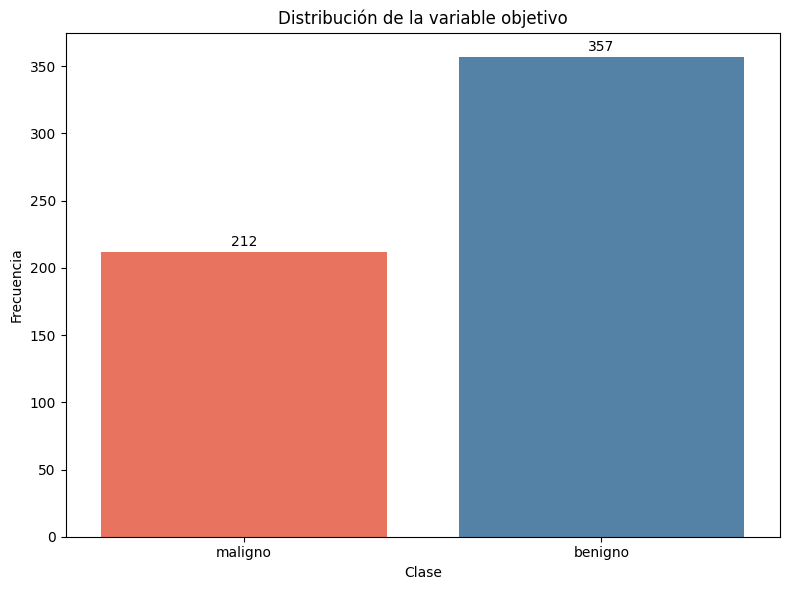

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV desde GitHub
df = pd.read_csv("https://raw.githubusercontent.com/marsgr6/rna-online/refs/heads/main/data/breast_cancer.csv")

# # Visualizar frecuencias de la variable objetivo
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x="target",
    hue="target",
    palette={'maligno': 'tomato', 'benigno': 'steelblue'}
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
plt.title("Distribución de la variable objetivo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.tight_layout()

En el set de datos podemos identificar que la mayoría de casos correponde a benigno, con un 60% del total de los datos, y en este caso particular podríamos considerar que con estos datos de entrenamiento el porcentaje de predicción de casos benignos será superior. Esta distruibución facilita la predicción al tener características diversas para ambos mundos y podemos tener un pull de datos bastante completo para laspruebas estadísticas del modelo, evitando el uso de balanceadores de la población por medio de datos sintéticos.

#### 🔍 2. Visualización por pares de algunas variables numéricas

Text(0.5, 1.02, 'Visualización por pares de variables')

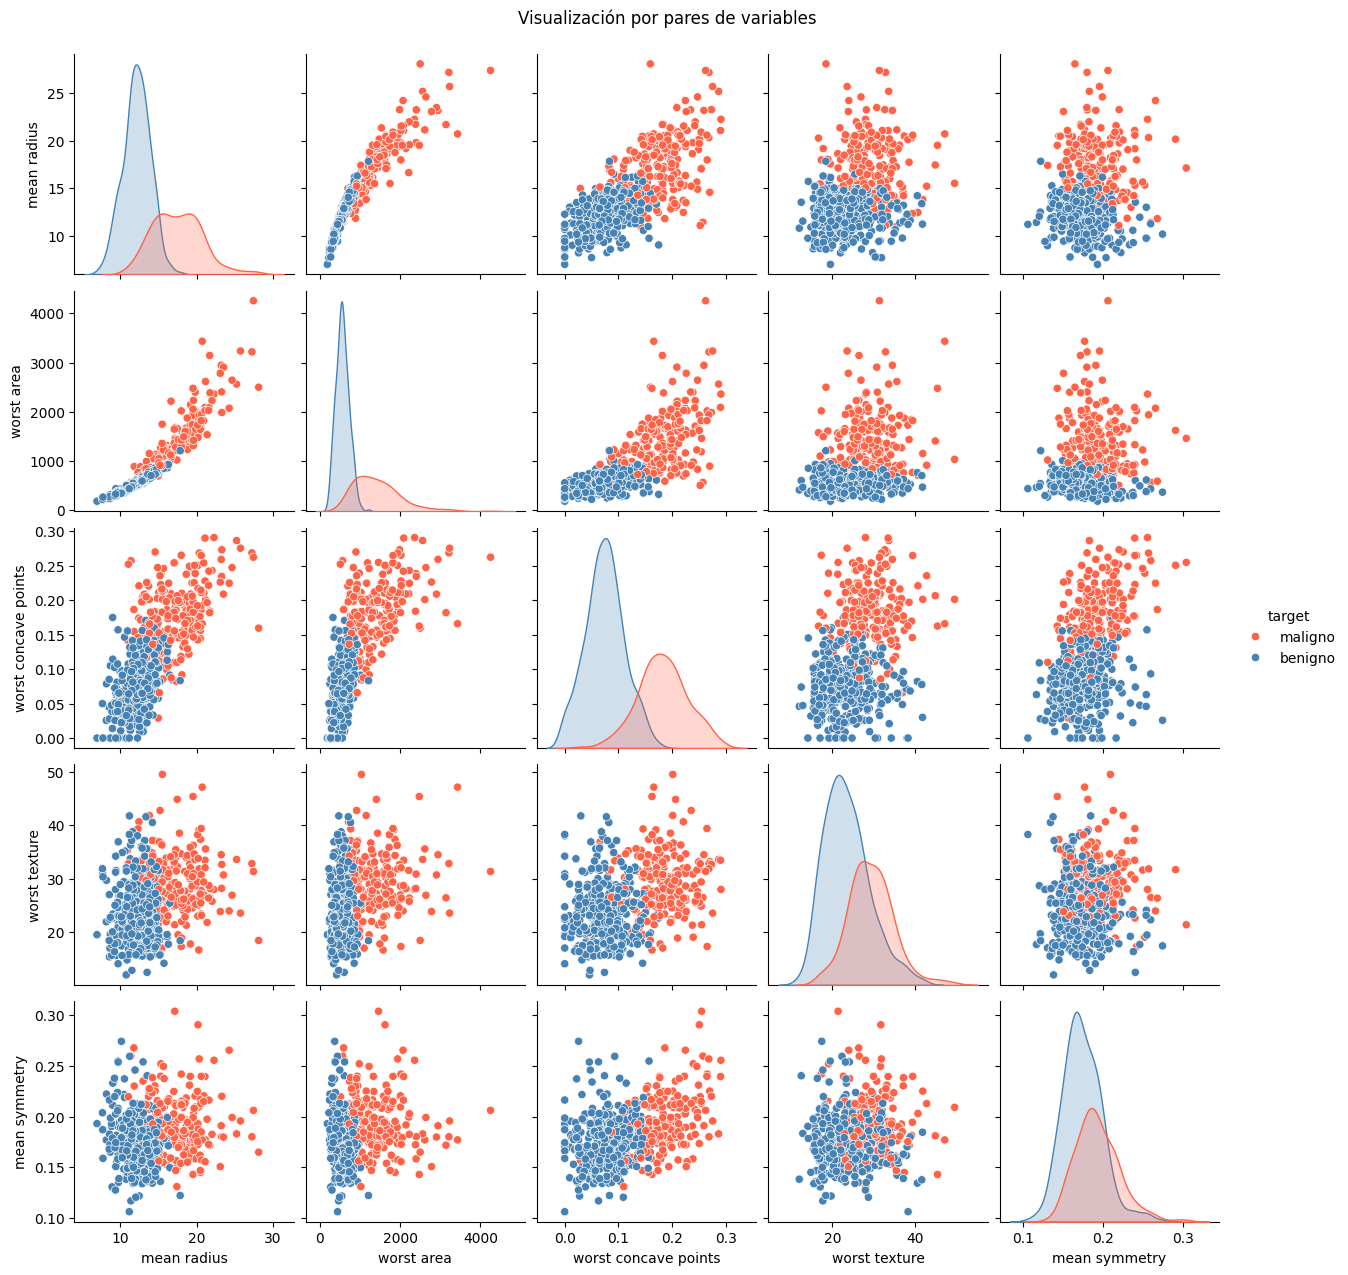

In [2]:
# Seleccionar algunas variables numéricas (puedes cambiar)
features = ['mean radius', 'worst area', 'worst concave points', 'worst texture', 'mean symmetry']

# Pairplot para explorar relaciones entre variables
sns.pairplot(data=df[features + ['target']], hue='target', palette={'maligno': 'tomato', 'benigno': 'steelblue'})
plt.suptitle("Visualización por pares de variables", y=1.02)

Luego de hacer algunos ejercicios comparativos entre pares de variables, observamos que la mayoría de combinaciones permite obtener una clara distribución de las categorías benigo maligno.

#### 🧪 3. Separar conjunto de entrenamiento y prueba

In [25]:
from sklearn.model_selection import train_test_split

# Definir variables X e y
X = df.drop(columns=['target'])
y = df['target']

# Separar datos (ej. 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

Para la separación de datos en train/test, se decidió por una población **80/20**, de igual manera se probó poblaciones de 75/25 y 70/30 sin tener una mejora ya que en este caso de estudio, *detectar cáncer*, lo que buscamos es reducir los *falsos negativos* que serían los más perjudiciales para las personas.

#### ⚙️ 4. Escalar los datos

In [26]:
from sklearn.preprocessing import StandardScaler

# Normalizar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Se normaliza las características de las 30 variables numéricas por medio del uso de StandarScaler, con lo cual tendremos a todas las variables en rangos similares de valores.

#### 🤖 5. Entrenar el modelo MLP

In [27]:
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo
mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=42, activation='relu')
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=42)

En base a la teoría vista se inicia la prueba con una capa oculta de 30 neuronas por el número de características con el uso de una función de activación relu, 1000 iteraciones y el resto hipérparámetros por defecto

El entrenamiento se realiza por medio retropropagación con MLPClassifier y un umbral de 0.5 para asignar la clase

#### 📊 6. Evaluación del modelo


Reporte de clasificación:
               precision    recall  f1-score   support

     benigno       0.96      1.00      0.98        72
     maligno       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



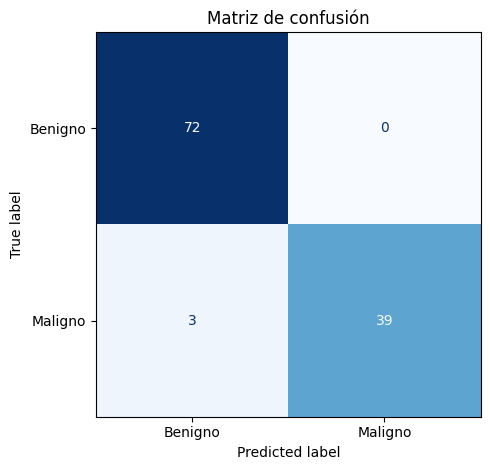

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Realizar predicciones
y_pred = mlp.predict(X_test_scaled)

# Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Benigno', 'Maligno'],
    cmap='Blues',
    colorbar=False
)
plt.title("Matriz de confusión")
plt.grid(False)
plt.tight_layout()

En el primer modelo probado, podemos apreciar distintos puntos en base a las métricas resultantes:

* Para el caso de los benignos vemos un recall perfecto de 1, desde un punto de vista médico esto sería excelente para la predicción de tumores benignos, pero se debería analizar si el modelo está presentando sobreajuste para estos casos
* La precisión tanto para benignos como malignos es alta, con lo cual el porcentaje de error es bastante pequeño, sin embargo según el caso de estudio el error puede desenbocar en consecuencias fatales.
* Para los malignos se ve un recall de 0.92, desde un punto de vista médico esta sería una métrica que se debe mejorar ya que un falso negativo en el caso de un tumor maligno puede incurrir en graves consecuencias de salud e inclusive fatales para quien recibe la información.

#### ✅ Recomendaciones finales


Reporte de clasificación:
               precision    recall  f1-score   support

     benigno       0.99      1.00      0.99        72
     maligno       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



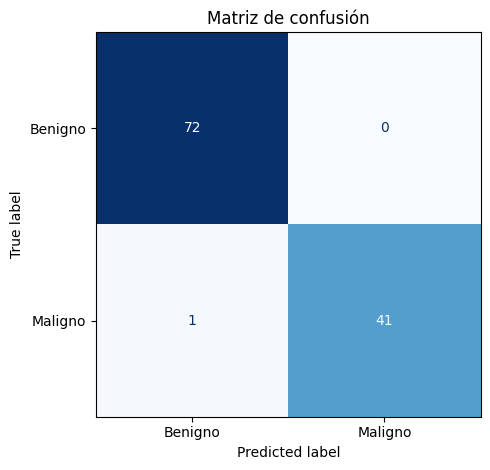

In [29]:
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42, activation='logistic')
mlp.fit(X_train_scaled, y_train)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Realizar predicciones
y_pred = mlp.predict(X_test_scaled)

# Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Benigno', 'Maligno'],
    cmap='Blues',
    colorbar=False
)
plt.title("Matriz de confusión")
plt.grid(False)
plt.tight_layout()

En base a los primeros resultados, se decidió evaluar un segundo modelo con los siguientes hiperparámetros: una capa oculta de 50 neuronas, 1000 iteraciones y logistic como función de activación. Obteniendo los siguientes resultados:

* Mantenemos las estadísticas en valores muy buenos para la precisión de benigno manteniendo el mismo recall de 1.
* El recall de maligno presenta una mejora significativa de 0.93 a 0.98, basándose nuevamente en el punto de vista médico es una métrica que se buscaría maximizar para esta etiqueta para evitar diagnósticos errados.


#### Reflexión

El modelo clasificó exitosamente los benignos y malignos, vemos una matriz de confusión con una diagonal claramente distinguida y mínimos casos falsos, las métricas que principalmente se destacan es el recall para lograr minimizar los falsos negativos y la presición para conocer el poder predictivo del modelo.
Es muy importante entender el caso de análisis a la hora de analizar las variables, ya que como en este caso los falsos negativos son los que más tendríamos que evitar y los llamados a tener un recall perfecto de 1.

Mejoras recomendadas

* Incluir muestras de diferentes poblaciones y equipos al igual que aumentar el tamaño de la muestra con el fin de detectar si el modelo está presentando sobreajuste con el dataset actual y evitar el sobreentrenamiento
* Aplicar una regularización (alpha) para evitar sobreajuste
* Continuar con la prueba de diferentes hiperparámetros dentro del modelo como la cantidad de capas ocultas, número de neuronas, la función de activación o las iteraciones, sobre todo con el aumento de la población para maximar el rendimiento del modelo
* Diversificar las variables exógenas buscando identificar si otro conjunto de variables ayuda a lograr una mejor predicción

Implicaciones clínicas
* Un modelo con este rendimiento puede ser un excelente sistema de apoyo al diagnóstico, pero no debe reemplazar la decisión médica y para minimizar falsos negativos debería explorarse el obtener más variables para categorizar la predicción.
* Los errores, aunque pocos, pueden tener consecuencias graves, por lo que se recomienda usarlo como herramienta complementaria a la opinión de un especialista. La IA es mejor utilizada cuando ayuda a aumentar la productividad de las personas.